# Salary Prediction

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Regression](#regression)
- [Part III - Interpret Results](#interpret)


<a id='intro'></a>
### Introduction

Linear Regression is very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of a Linear Regression model associated with salaries.  Your goal is to work through this notebook to understand what variables are related to salary, and how exactly they are related.

As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(0)

For each of the parts of question `1` notice links to [pandas documentation](https://pandas.pydata.org/) is provided to assist with answering the questions.  Though there are other ways you could solve the questions, the documentation is provided to assist you with one fast way to find the answer to each question.


`1.a)` Now, read in the `salary_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. **This question is completed for you**:

In [2]:
df = pd.read_csv('salary_data.csv')
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
df.head()


,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful pandas link - `Dataframe.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [3]:
print(f"Dataset shape (rows, columns): {df.shape}")


Dataset shape (rows, columns): (375, 6)


`c)` Do any of the rows have missing values? [Helpful pandas link - `Dataframe.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [helpful pandas link - `Dataframe.sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

If there are missing values, determine a method for dealing with them.

In [4]:
missing_summary = pd.DataFrame({
    'missing': df.isnull().sum(),
    'percent': df.isnull().mean() * 100
})
print(f"Total missing cells: {int(missing_summary['missing'].sum())}")
missing_summary


Total missing cells: 12


,missing,percent
age,2,0.533333
gender,2,0.533333
education_level,2,0.533333
job_title,2,0.533333
years_of_experience,2,0.533333
salary,2,0.533333


In [5]:
df = df.dropna().reset_index(drop=True)
df[['gender', 'education_level', 'job_title']] = df[['gender', 'education_level', 'job_title']].apply(lambda col: col.str.strip())
print("After dropping rows with any missing values:", df.shape)
df.head()


After dropping rows with any missing values: (373, 6)


,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


`d)` How many employees are in each `Education Level`? Build a bar chart to show the count of employees in each level.

In [6]:
df['education_level'].value_counts().rename_axis('education_level').to_frame('count')


,count
education_level,
Bachelor's,224
Master's,98
PhD,51


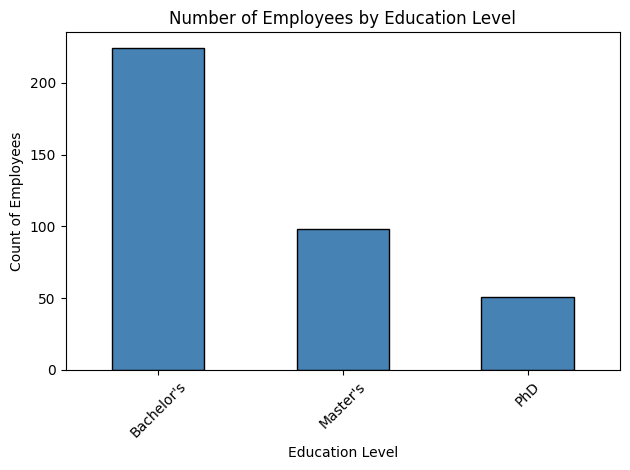

In [7]:
df['education_level'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black');
plt.title('Number of Employees by Education Level');
plt.ylabel('Count of Employees');
plt.xlabel('Education Level');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();


`e)` What are the possible values for `Salary`?  What does the distribution of `Salary` look like?

In [8]:
salary_summary = df['salary'].describe(percentiles=[0.25, 0.5, 0.75])
salary_summary


count       373.000000
mean     100577.345845
std       48240.013482
min         350.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: salary, dtype: float64

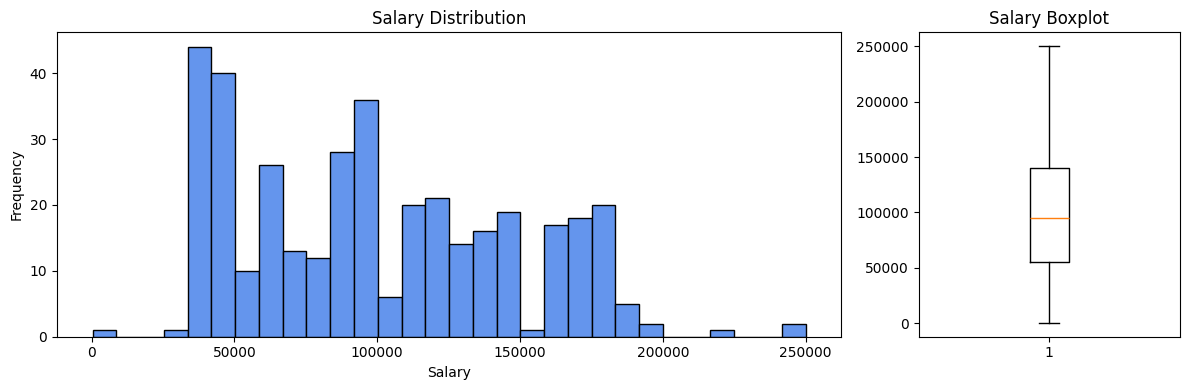

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 1]})
axes[0].hist(df['salary'], bins=30, edgecolor='black', color='cornflowerblue')
axes[0].set_title('Salary Distribution')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(df['salary'], vert=True)
axes[1].set_title('Salary Boxplot')

plt.tight_layout()
plt.show()


<a id='regression'></a>
#### Part II - Regression

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `Salary`.

`a)` Consider average salary by gender, is there evidence that salaries are higher for one gender over the other? **This question is completed for you**

In [10]:
summary_by_gender = df.groupby('gender')['salary'].agg(['count', 'mean', 'median'])
print(summary_by_gender)

mean_diff = summary_by_gender['mean'].get('Male', np.nan) - summary_by_gender['mean'].get('Female', np.nan)
print(f"\nMean difference (Male - Female): {mean_diff:,.2f}")


        count           mean   median
gender                               
Female    179   97011.173184  90000.0
Male      194  103867.783505  97500.0

Mean difference (Male - Female): 6,856.61


`b)` Consider average salary by education level, is there evidence that salaries are higher for increased education?

In [11]:
df.groupby('education_level')['salary'].agg(['count', 'mean', 'median']).sort_values('mean', ascending=False)


,count,mean,median
education_level,,,
PhD,51,157843.137255,155000.0
Master's,98,129795.918367,120000.0
Bachelor's,224,74756.026786,65000.0


`c)` Consider average salary by years of experience, is there evidence that salaries are associated with increased years of experience?

Pearson correlation (salary vs years_of_experience): 0.930


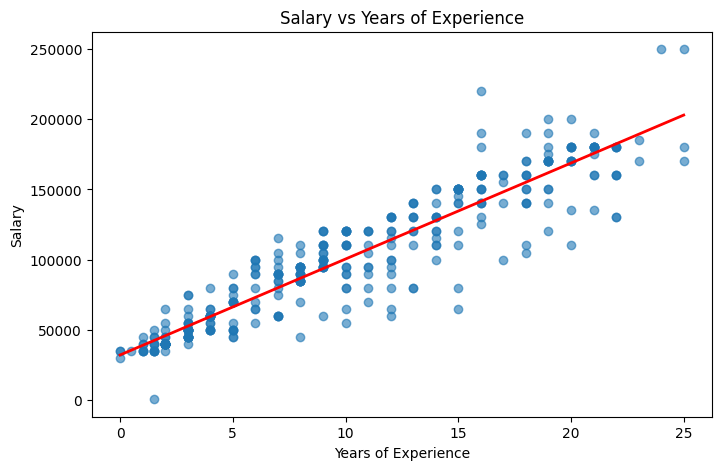

In [12]:
corr = df['years_of_experience'].corr(df['salary'])
print(f"Pearson correlation (salary vs years_of_experience): {corr:.3f}")

plt.figure(figsize=(8, 5))
plt.scatter(df['years_of_experience'], df['salary'], alpha=0.6)
xp = np.linspace(df['years_of_experience'].min(), df['years_of_experience'].max(), 100)
z = np.polyfit(df['years_of_experience'], df['salary'], 1)
plt.plot(xp, np.polyval(z, xp), color='red', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()


`d)`  To make use of Job Title column, let's create a bool flag based on word existence

List of words: 

* Director
* Junior
* Senior
* Manager
* Analyst
* Engineer

**This question is completed for you**

In [13]:
flag_words = ['director', 'junior', 'senior', 'manager', 'analyst', 'engineer']
df['job_title'] = df['job_title'].str.lower()

for word in flag_words:
    df['is_' + word] = df['job_title'].str.contains(word)

df = df.drop('job_title', axis=1)
df[[f'is_{w}' for w in flag_words]].head()


,is_director,is_junior,is_senior,is_manager,is_analyst,is_engineer
0,False,False,False,False,False,True
1,False,False,False,False,True,False
2,False,False,True,True,False,False
3,False,False,False,False,False,False
4,True,False,False,False,False,False


`e)` Create a flag for gender where 1 is if a person is male and 0 if the person is not.

In [14]:
df['is_male'] = (df['gender'].str.lower() == 'male').astype(int)
df[['gender', 'is_male']].head()


,gender,is_male
0,Male,1
1,Female,0
2,Male,1
3,Female,0
4,Male,1


`f)` Use statsmodels to fit a linear model to predict salary using each of the features from `a-e`.  These include:
* Gender
* Job TItle
* Years of Experience
* Education

In [15]:
import statsmodels.api as sm

df_model = df.copy()
flag_cols = [f'is_{w}' for w in flag_words]
df_model[flag_cols] = df_model[flag_cols].astype(int)
edu_dummies = pd.get_dummies(df_model['education_level'], prefix='edu', drop_first=True)

X = pd.concat([df_model[['years_of_experience', 'is_male']], df_model[flag_cols], edu_dummies], axis=1)
X = sm.add_constant(X.astype(float))
y = df_model['salary']

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sat, 15 Nov 2025   Prob (F-statistic):          2.41e-187
Time:                        22:18:14   Log-Likelihood:                -4090.6
No. Observations:                 373   AIC:                             8203.
Df Residuals:                     362   BIC:                             8246.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.212e+04   2485.604     12.921      0.000    2.72e+04     3.7e+04
years_of_experience  4937.4278    197.548     24.994      0.000    4548.941    5325.914
is_male              7484.7304   1509.904      4.957      0.000    4515.446    1.05e+04
is_director          2.539e+04   3535.194      7.181      0.000    1.84e+04    3.23e+04
is_junior           -4492.5634   2458.516     -1.827      0.068   -9327.330     342.203
is_senior            1.307e+04   1976.833      6.610      0.000    9178.417     1.7e+04
is_manager           4434.5081   1960.352      2.262      0.024     579.400    8289.617
is_analyst           -176.3409   2103.878     -0.084      0.933   -4313.698    3961.016
is_engineer          2362.9515   3561.972      0.663      0.508   -4641.805    9367.708
edu_Master's         1.345e+04   2053.896      6.547      0.000    9408.638    1.75e+04
edu_PhD              2.327e+04   2801.927      8.304      0.000    1.78e+04    2.88e+04
==============================================================================
Omnibus:                      130.784   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1091.992
Skew:                           1.230   Prob(JB):                    7.53e-238
Kurtosis:                      11.013   Cond. No.                         63.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='interpretation'></a>
### Part III - Interpret Results

`1.` Consider you are tasked with finding which features in your linear model are significantly related to salary.  Were there any features that were not significantly related to salary in your first model?  If not, remove those features and fit a new model.  Only keep the features that were significant from the original model.

In [16]:
sig_features = [feature for feature, pval in model.pvalues.items() if (feature != 'const' and pval < 0.05)]
nonsig_features = [feature for feature, pval in model.pvalues.items() if (feature != 'const' and pval >= 0.05)]

print("Removed non-significant features (p >= 0.05):", nonsig_features)

X_sig = X[['const'] + sig_features]
reduced_model = sm.OLS(y, X_sig).fit()
reduced_model.summary()


Removed non-significant features (p >= 0.05): ['is_junior', 'is_analyst', 'is_engineer']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     557.4
Date:                Sat, 15 Nov 2025   Prob (F-statistic):          1.46e-190
Time:                        22:18:14   Log-Likelihood:                -4092.6
No. Observations:                 373   AIC:                             8201.
Df Residuals:                     365   BIC:                             8233.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.876e+04   1677.411     17.146      0.000    2.55e+04    3.21e+04
years_of_experience  5104.4388    177.226     28.802      0.000    4755.927    5452.950
is_male              7629.6521   1481.834      5.149      0.000    4715.649    1.05e+04
is_director          2.498e+04   3503.028      7.131      0.000    1.81e+04    3.19e+04
is_senior            1.445e+04   1820.427      7.936      0.000    1.09e+04     1.8e+04
is_manager           4284.6595   1822.582      2.351      0.019     700.579    7868.740
edu_Master's         1.404e+04   2032.078      6.908      0.000       1e+04     1.8e+04
edu_PhD              2.308e+04   2760.740      8.360      0.000    1.77e+04    2.85e+04
==============================================================================
Omnibus:                      126.635   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.895
Skew:                           1.196   Prob(JB):                    3.07e-220
Kurtosis:                      10.702   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`a)` With each additional year of experience, what is the expected change in salary?  What is the 95% confidence interval of the change?

With each additional year of experience, the model predicts salary increases by about $5,104. The 95% confidence interval is roughly [$4,756, $5,453], so we are highly confident the effect is positive.


`b)` What is the expected difference in salary between someone with a senior title and someone with none of the other title indications?

Holding everything else constant, having "senior" in the title adds about $14,450 compared with someone without any of the tracked title flags. The 95% confidence interval is about [$10,867, $18,026], indicating a strong, positive and significant effect.


`c)` What is the expected difference in salary between someone with a PhD and an individual with no PhD nor master's degree?  What is the 95% confidence interval of the change?

Relative to a bachelor's degree, a PhD is associated with about $23,080 higher salary. The 95% confidence interval is roughly [$17,652, $28,510], so we are confident the lift is real and positive.


`d)` If a male employee has 5 years of experience as a senior engineer with a bachelor's degree, what is the expected salary of the employee?

Using the reduced model (male=1, senior title=1, manager/director=0, bachelor's baseline, 5 years of experience), the predicted salary is about $76,359.


`e)` Imagine that the employee in question `d)` actually has a salary of $110,000, what would the residual be for this employee?

If the actual salary is $110,000, the residual (actual - predicted) is about +$33,641, meaning the employee earns well above what the model expects.


`f)` How well do you think your model fits?  What metrics or plots would you consider to understand if this model does a good job of predicting salary?

R-squared: 0.914
RMSE: 14,089.87


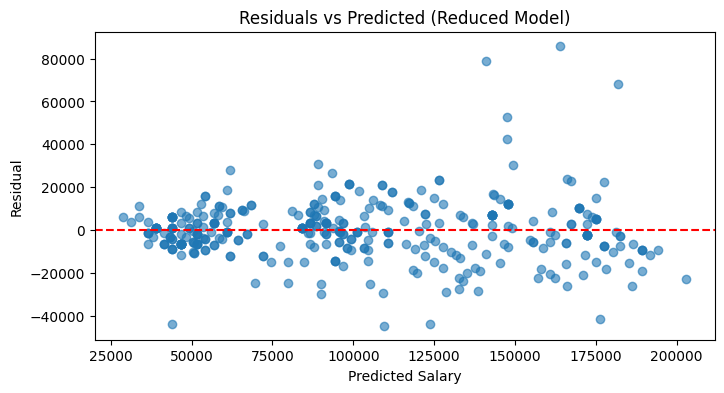

In [17]:
preds = reduced_model.predict(X_sig)
rmse = np.sqrt(((y - preds) ** 2).mean())
print(f"R-squared: {reduced_model.rsquared:.3f}")
print(f"RMSE: {rmse:,.2f}")

plt.figure(figsize=(8, 4))
plt.scatter(preds, y - preds, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted (Reduced Model)')
plt.show()


The reduced model explains ~91% of salary variance (R-squared ~ 0.914) with RMSE around $14k. Residuals show some right skew/heavy tails (JB statistic), so I would also review QQ plots, leverage/influence points, and possibly try log-salary or interaction terms to check assumptions and stability.


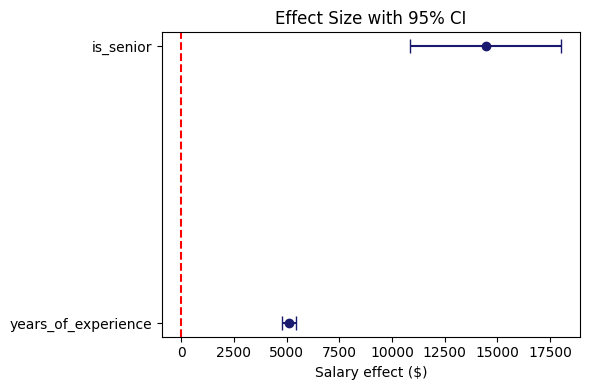

,coef,ci_lower,ci_upper
years_of_experience,5104.438763,4755.927085,5452.950440
is_senior,14446.475663,10866.633064,18026.318261


In [18]:
effects = ['years_of_experience', 'is_senior']
coef = reduced_model.params.loc[effects]
ci = reduced_model.conf_int().loc[effects]
err_low = coef - ci[0]
err_high = ci[1] - coef

plt.figure(figsize=(6, 4))
plt.errorbar(coef, effects, xerr=[err_low, err_high], fmt='o', capsize=5, color='midnightblue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Salary effect ($)')
plt.title('Effect Size with 95% CI')
plt.tight_layout()
plt.show()

pd.DataFrame({'coef': coef, 'ci_lower': ci[0], 'ci_upper': ci[1]})


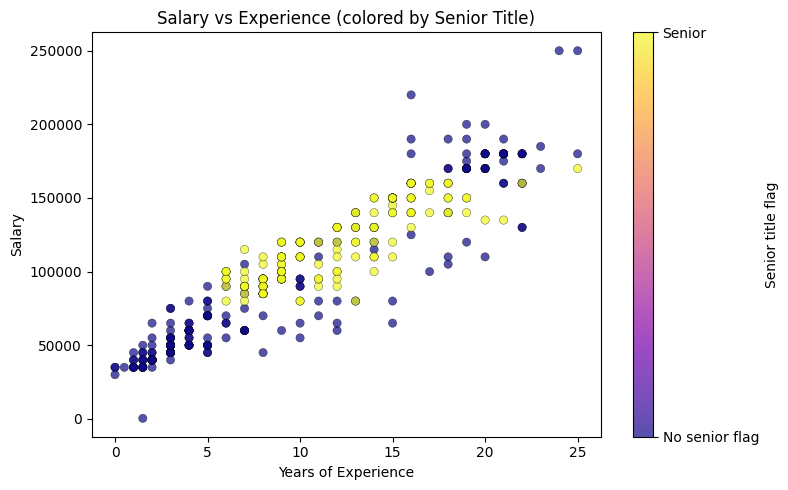

In [19]:
# Salary vs. experience colored by senior flag
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    df['years_of_experience'],
    df['salary'],
    c=df['is_senior'].astype(int),
    cmap='plasma',
    alpha=0.7,
    edgecolor='k',
    linewidth=0.3
)
cb = plt.colorbar(scatter, ticks=[0, 1])
cb.set_label('Senior title flag')
cb.set_ticks([0, 1])
cb.set_ticklabels(['No senior flag', 'Senior'])

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (colored by Senior Title)')
plt.tight_layout()
plt.show()


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the salary prediction project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission

Please follow the directions in the classroom to submit this notebook, as well as your completed slides.